## NLP_hebrew_text_analyze
A model to predict if a story belong to male or female

### Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [1]:
# imports for reading and writing (input & output) files:
import pandas as pd
import os
import sys

import numpy as np

# Regular Expressions + Strings
import string
import re  

import warnings
warnings.filterwarnings("ignore")

# Library for Tokenization
import nltk
from nltk.tokenize import word_tokenize

# Visualization
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns

# Vectorization, Fit and Predict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, Perceptron 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

# Evaluate the model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [2]:
train_filename = '.' + os.sep + 'input' + os.sep + 'annotated_corpus_for_train.xlsx'
test_filename  = '.' + os.sep + 'input' + os.sep + 'test.xlsx'
df_train = pd.read_excel(train_filename, 'corpus', index_col=None, na_values=['NA'])
df_test  = pd.read_excel(test_filename,  'corpus', index_col=None, na_values=['NA'])

Replace target parmeters (object) into categorical (binary - 0/1)

In [3]:
replace_str_to_catgorical = {'f':0, 'm':1}
df_train.replace(replace_str_to_catgorical, inplace=True)
df_test.replace(replace_str_to_catgorical, inplace=True)

In [4]:
df_train.head(8)

,story,gender
0,"בוקר אחד קמתי סהרורי יצאתי מהמיטה קצת מטושטש ,...",1
1,לחבר שלי היה יום הולדת וחיפשנו מה אפשר לעשות ל...,1
2,"השנה האחרונה הייתה שנת קורונה, שנה לא פשוטה בק...",1
3,"לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי, עב...",1
4,"יום חמישי רגיל, תמיד מתחיל לעבור טיפה מאוחר יו...",1
5,בשנה האחרונה חוויתי את מגפת הקורונה שהכריח את ...,1
6,בסמסטר קודם אני וכמה חברים ללימודים קבענו להיפ...,1
7,בשנה האחרונה למרות שלא היו יותר מידיי דברים לע...,0


In [5]:
df_test.head(3)

,story,gender
0,כחלק ממסגרת ההתנדבות שלי במגלה אני הולך לפעמיי...,1
1,"לפני שנה החלטתי שאני רוצה להיות טייס, התחלתי ל...",1
2,"בתקופת הקורונה של תחילת החיסונים נגד קורונה, א...",0


### Your implementation:
Write your code solution in the following code-cells

# <span style='font-family:"Times New Roman"'> <span styel=''>Preparing & Basic Information Of Train DataFrame

In [6]:
df_train.shape

(364, 2)

In [7]:
df_train.columns

Index(['story', 'gender'], dtype='object')

In [8]:
df_train.dtypes

story     object
gender     int64
dtype: object

In [9]:
df_train.head()

,story,gender
0,"בוקר אחד קמתי סהרורי יצאתי מהמיטה קצת מטושטש ,...",1
1,לחבר שלי היה יום הולדת וחיפשנו מה אפשר לעשות ל...,1
2,"השנה האחרונה הייתה שנת קורונה, שנה לא פשוטה בק...",1
3,"לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי, עב...",1
4,"יום חמישי רגיל, תמיד מתחיל לעבור טיפה מאוחר יו...",1


In [10]:
df_train.tail(5)

,story,gender
359,לפני כ3 שנים התגוררתי למשך שנה בגרמניה. מטרת ה...,1
360,"ביום הבחירות נסענו לבקר את אימי ז""ל בבית הקברו...",1
361,בשנה אחרונה חוויתי לראשונה את תהליך חיפוש העבו...,1
362,"אני סטודנט במכללה, בסמסטר א בשנת תשפ""א נגשתי ל...",1
363,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,0


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   story   364 non-null    object
 1   gender  364 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [12]:
df_train.describe(include='all')

,story,gender
count,364,364.000000
unique,364,NaN
top,"הסיפור הזה התרחקש כשאר הייתי בדרום אמריקה, זה ...",NaN
freq,1,NaN
mean,NaN,0.744505
std,NaN,0.436739
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,1.000000


In [13]:
df_train.gender.describe()

count    364.000000
mean       0.744505
std        0.436739
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: gender, dtype: float64

In [14]:
df_train.gender.value_counts()

1    271
0     93
Name: gender, dtype: int64

# <span style='font-family:"Times New Roman"'> <span styel=''>Visualization and correlation


Text(0.5, 1.0, 'Gender disribution')

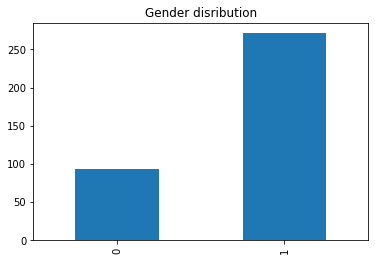

In [15]:
df_train['gender'].value_counts().sort_index().plot(kind='bar')
plt.title('Gender disribution')

### <span style='font-family:"Times New Roman"'> <span styel=''> Number of words & characters in a text <br><br>  *The distribution's  midian value is represented by vertical dashed lines.* <br> *story_len = number of characters at each text* <br> *story_n_words = number of words at each text*</br>

In [16]:
visulization_df = df_train.copy()

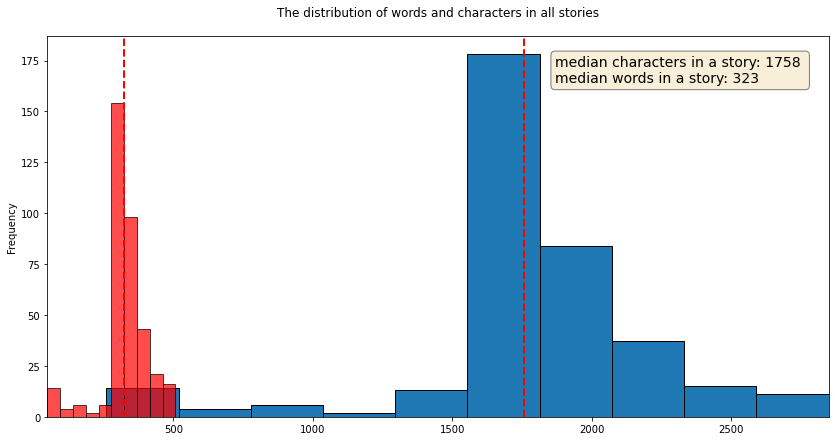

In [17]:
visulization_df['story_len'] = visulization_df['story'].map(lambda x: len(x))
visulization_df['story_n_words'] = visulization_df['story'].map(lambda x: len(x.split()))
fig, ax = plt.subplots(figsize=(14,7))
visulization_df.story_len.plot(kind='hist',edgecolor="k");
visulization_df.story_n_words.plot(kind='hist',color='r',edgecolor="k", alpha=0.7);
plt.axvline(visulization_df['story_len'].median(), ls = '--',color='r',lw=2);
plt.axvline(visulization_df['story_n_words'].median(), ls = '--',color='r',lw=2);
textstr = (f"median characters in a story: {round(visulization_df['story_len'].median())} \n"
           f"median words in a story: {round(visulization_df['story_n_words'].median())}")  
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5,edgecolor='black')
plt.text(0.65, 0.95, textstr, fontsize=14,transform=ax.transAxes,verticalalignment='top', bbox=props)
plt.title("The distribution of words and characters in all stories", pad=20);plt.margins(x=0);

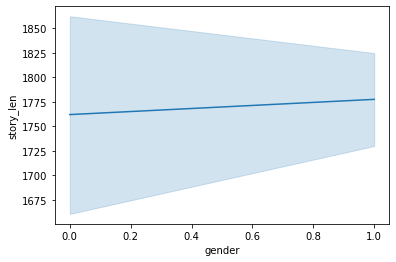

In [18]:
sns.lineplot(data=visulization_df, x = 'gender', y='story_len')

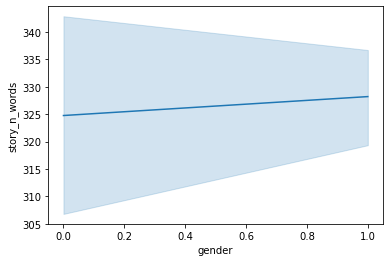

In [19]:
sns.lineplot(data=visulization_df, x = 'gender', y='story_n_words')

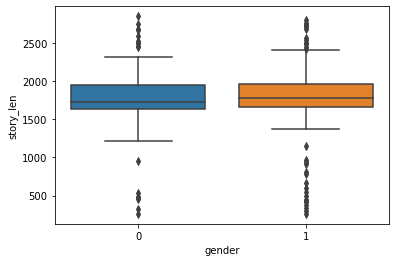

In [20]:
sns.boxplot(visulization_df.gender, visulization_df.story_len)

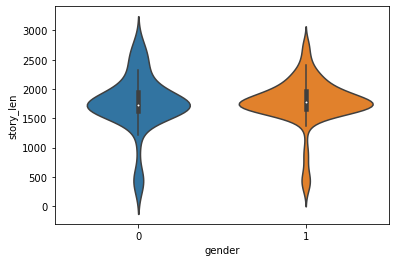

In [21]:
sns.violinplot(visulization_df.gender, visulization_df.story_len)

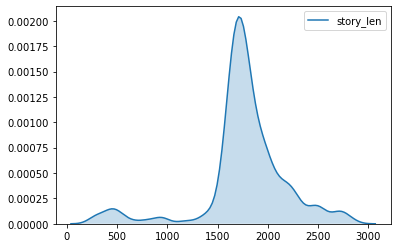

In [22]:
sns.kdeplot(visulization_df.story_len, shade=True)

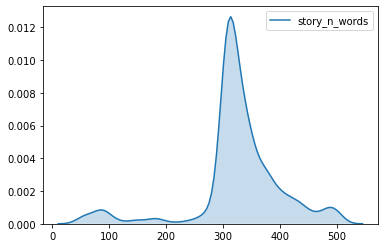

In [23]:
sns.kdeplot(visulization_df.story_n_words, shade=True)

In [24]:
mean_analyze = visulization_df.groupby(['gender']).mean()[['story_len', 'story_n_words']]
mean_analyze

,story_len,story_n_words
gender,,
0,1762.064516,324.752688
1,1777.616236,328.206642


# <span style='font-family:"Times New Roman"'> <span styel=''>Data Pre-Processing 

### <span style='font-family:"Times New Roman"'> <span styel=''> clean the text from punctuation, emojis, numbers, urls <br> <br> *Punctuation - !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~ </br>

In [25]:
train_set_df_copy = df_train.copy()

In [26]:
def remove_pe(text, p=string.punctuation):  # string.punctuation is a built in list of all punctuation
    "remove punctuation and emojis"
    text_without = "".join([c for c in text if c not in p])
    return text_without

In [27]:
def removeWeirdChars(text):
    weridPatterns = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u'\U00010000-\U0010ffff'
                               u"\u200d"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               u"\ufe0f"
                               u"\u2069"
                               u"\u2066"
                               u"\u200c"
                               u"\u2068"
                               u"\u2067"
                               "]+", flags=re.UNICODE)
    return weridPatterns.sub(r'', text)

In [28]:
#implementation of 2 functions above

train_set_df_copy['clean_text'] = train_set_df_copy['story'].apply(lambda x: remove_pe(x)).apply(lambda x: re.sub(r'[A-Za-z]|http\S+|[0-9]+', '',x))\
                     .apply(lambda x: removeWeirdChars(x))

#regex for url

In [29]:
train_set_df_copy[["clean_text"]].tail(5)

,clean_text
359,לפני כ שנים התגוררתי למשך שנה בגרמניה מטרת המע...
360,ביום הבחירות נסענו לבקר את אימי זל בבית הקברות...
361,בשנה אחרונה חוויתי לראשונה את תהליך חיפוש העבו...
362,אני סטודנט במכללה בסמסטר א בשנת תשפא נגשתי למב...
363,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...


### <span style='font-family:"Times New Roman"'> <span styel=''> Stop Words + Tokenization


In [30]:
 with open ("Stop_Words.txt", "r", encoding="UTF-8") as myfile:
        he_s_words = myfile.read().splitlines()

In [31]:
def process_text(text):
    
    # Return tokenized(spliting each text to words) and removing Hebrew stop words & prefix.
    
    tokens = word_tokenize(text)
    
    # Removing specific prefix
    
    prefix_1 = 'ו'
    prefix_2 = 'ש'
    prefix = 'ל'
    
    for word in tokens:
        
        if word.startswith(prefix) or word.startswith(prefix_1) or word.startswith(prefix_2):
            word = word[1:] 
            
       
    remove_stopwords = [token for token in tokens if token not in he_s_words]
    return remove_stopwords

In [32]:
train_set_df_copy['tokenized_text'] = train_set_df_copy['clean_text'].apply(process_text)
train_set_df_copy[['tokenized_text']].head()

,tokenized_text
0,"[אחד, קמתי, סהרורי, יצאתי, מהמיטה, מטושטש, קמת..."
1,"[לחבר, היה, הולדת, וחיפשנו, לעשות, לו, הולדת, ..."
2,"[האחרונה, הייתה, שנת, קורונה, פשוטה, בקנה, מיד..."
3,"[כחצי, עברתי, לגור, בצפון, בת, זוגתי, עברנו, ל..."
4,"[חמישי, רגיל, מתחיל, לעבור, טיפה, מאוחר, ללכת,..."


In [33]:
train_set_df_copy[['tokenized_text']].tail(5)

,tokenized_text
359,"[התגוררתי, למשך, בגרמניה, מטרת, המעבר, לשם, הי..."
360,"[הבחירות, נסענו, לבקר, את, אימי, זל, הקברות, ה..."
361,"[בשנה, אחרונה, חוויתי, לראשונה, את, תהליך, חיפ..."
362,"[סטודנט, במכללה, בסמסטר, בשנת, תשפא, נגשתי, למ..."
363,"[‏הייתי, מדריכה, בכפר, נוער, ומתאם, הכפר, היינ..."


In [34]:
print(f"Out of {train_set_df_copy.clean_text.str.split(' ').str.len().sum()} words in {len(train_set_df_copy)} texts"\
     f", {train_set_df_copy.clean_text.str.split(' ').str.len().sum() - train_set_df_copy.tokenized_text.str.len().sum()} stop words were removed.") 

Out of 117828 words in 364 texts, 33042 stop words were removed.


In [35]:
train_set_df_copy.head()

,story,gender,clean_text,tokenized_text
0,"בוקר אחד קמתי סהרורי יצאתי מהמיטה קצת מטושטש ,...",1,בוקר אחד קמתי סהרורי יצאתי מהמיטה קצת מטושטש ...,"[אחד, קמתי, סהרורי, יצאתי, מהמיטה, מטושטש, קמת..."
1,לחבר שלי היה יום הולדת וחיפשנו מה אפשר לעשות ל...,1,לחבר שלי היה יום הולדת וחיפשנו מה אפשר לעשות ל...,"[לחבר, היה, הולדת, וחיפשנו, לעשות, לו, הולדת, ..."
2,"השנה האחרונה הייתה שנת קורונה, שנה לא פשוטה בק...",1,השנה האחרונה הייתה שנת קורונה שנה לא פשוטה בקנ...,"[האחרונה, הייתה, שנת, קורונה, פשוטה, בקנה, מיד..."
3,"לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי, עב...",1,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,"[כחצי, עברתי, לגור, בצפון, בת, זוגתי, עברנו, ל..."
4,"יום חמישי רגיל, תמיד מתחיל לעבור טיפה מאוחר יו...",1,יום חמישי רגיל תמיד מתחיל לעבור טיפה מאוחר יות...,"[חמישי, רגיל, מתחיל, לעבור, טיפה, מאוחר, ללכת,..."


### An example to the difference between text's length before and after removing stop words

In [36]:
words = (train_set_df_copy.iloc[3,2]).split()
totalwords = len(words)
totalwords # num of words before removing stop words

355

In [37]:
len(train_set_df_copy.iloc[3,3]) # num of words after removing stop words

234

### <span style='font-family:"Times New Roman"'> <span styel=''> Creating new column which includes clean text after removing punctuation and stop words

In [38]:
def list_to_string(lst):  
    str1 = " "
    return (str1.join(lst))

In [39]:
train_set_df_copy['tokenized_clean_text'] = train_set_df_copy['tokenized_text'].apply(lambda x: list_to_string(x))

In [40]:
train_set_df_copy.head()

,story,gender,clean_text,tokenized_text,tokenized_clean_text
0,"בוקר אחד קמתי סהרורי יצאתי מהמיטה קצת מטושטש ,...",1,בוקר אחד קמתי סהרורי יצאתי מהמיטה קצת מטושטש ...,"[אחד, קמתי, סהרורי, יצאתי, מהמיטה, מטושטש, קמת...",אחד קמתי סהרורי יצאתי מהמיטה מטושטש קמתי בצעדי...
1,לחבר שלי היה יום הולדת וחיפשנו מה אפשר לעשות ל...,1,לחבר שלי היה יום הולדת וחיפשנו מה אפשר לעשות ל...,"[לחבר, היה, הולדת, וחיפשנו, לעשות, לו, הולדת, ...",לחבר היה הולדת וחיפשנו לעשות לו הולדת מנת לחגו...
2,"השנה האחרונה הייתה שנת קורונה, שנה לא פשוטה בק...",1,השנה האחרונה הייתה שנת קורונה שנה לא פשוטה בקנ...,"[האחרונה, הייתה, שנת, קורונה, פשוטה, בקנה, מיד...",האחרונה הייתה שנת קורונה פשוטה בקנה מידה אוניב...
3,"לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי, עב...",1,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,"[כחצי, עברתי, לגור, בצפון, בת, זוגתי, עברנו, ל...",כחצי עברתי לגור בצפון בת זוגתי עברנו לקיבוץ עמ...
4,"יום חמישי רגיל, תמיד מתחיל לעבור טיפה מאוחר יו...",1,יום חמישי רגיל תמיד מתחיל לעבור טיפה מאוחר יות...,"[חמישי, רגיל, מתחיל, לעבור, טיפה, מאוחר, ללכת,...",חמישי רגיל מתחיל לעבור טיפה מאוחר ללכת בבוקר ל...


# <span style='font-family:"Times New Roman"'> <span styel=''> Machine Learning

In [41]:
model_df = train_set_df_copy.copy()

In [42]:
model_df.drop(['story', 'clean_text', 'tokenized_text'], axis=1, inplace=True)

The dataframe which going to be trained

In [43]:
model_df.head()

,gender,tokenized_clean_text
0,1,אחד קמתי סהרורי יצאתי מהמיטה מטושטש קמתי בצעדי...
1,1,לחבר היה הולדת וחיפשנו לעשות לו הולדת מנת לחגו...
2,1,האחרונה הייתה שנת קורונה פשוטה בקנה מידה אוניב...
3,1,כחצי עברתי לגור בצפון בת זוגתי עברנו לקיבוץ עמ...
4,1,חמישי רגיל מתחיל לעבור טיפה מאוחר ללכת בבוקר ל...


In [44]:
visulization_df_2 = model_df.copy()

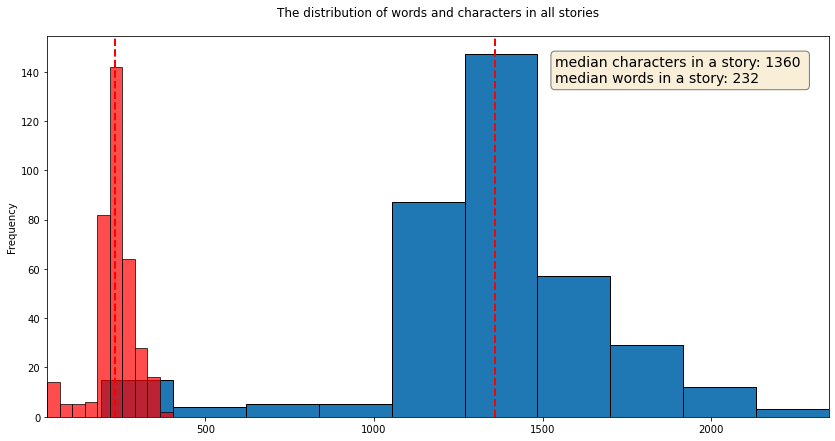

In [45]:
visulization_df_2['story_len'] = visulization_df_2['tokenized_clean_text'].map(lambda x: len(x))
visulization_df_2['story_n_words'] = visulization_df_2['tokenized_clean_text'].map(lambda x: len(x.split()))
fig, ax = plt.subplots(figsize=(14,7))
visulization_df_2.story_len.plot(kind='hist',edgecolor="k");
visulization_df_2.story_n_words.plot(kind='hist',color='r',edgecolor="k", alpha=0.7);
plt.axvline(visulization_df_2['story_len'].median(), ls = '--',color='r',lw=2);
plt.axvline(visulization_df_2['story_n_words'].median(), ls = '--',color='r',lw=2);
textstr = (f"median characters in a story: {round(visulization_df_2['story_len'].median())} \n"
           f"median words in a story: {round(visulization_df_2['story_n_words'].median())}")  
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5,edgecolor='black')
plt.text(0.65, 0.95, textstr, fontsize=14,transform=ax.transAxes,verticalalignment='top', bbox=props)
plt.title("The distribution of words and characters in all stories", pad=20);plt.margins(x=0);

In [46]:
vectorizer = CountVectorizer(max_features=7000)

# Fit the vectors
vectorizer.fit(model_df.tokenized_clean_text)
vector = vectorizer.transform(model_df.tokenized_clean_text) # matrix of 364 texts by tokens

CountVectorizer(max_features=7000)

In [47]:
vector_test = vectorizer.transform(df_test.story)
classifier = make_pipeline(LinearSVC())
classifier.fit(vector, model_df.gender)

pred_test = classifier.predict(vector_test)

acc_test = accuracy_score(df_test.gender, pred_test)
f1_test = f1_score(df_test.gender, pred_test, average='macro')
print('Total accuracy classification score: {:.2f}'.format(acc_test))
print('Total F1 classification score: {:.2f}'.format(f1_test))

Pipeline(steps=[('linearsvc', LinearSVC())])

Total accuracy classification score: 0.83
Total F1 classification score: 0.76


### Evaluate the model only by train_df

In [48]:
X_train,X_test,y_train,y_test = train_test_split(vector, df_train.gender, test_size=0.2, random_state=36)
classifier = make_pipeline(LinearSVC())
classifier.fit(X_train, y_train)

pred_test_split = classifier.predict(X_test)

acc_test = accuracy_score(y_test, pred_test_split)
f1_test = f1_score(y_test, pred_test_split, average='macro')
prec_test = precision_score(y_test, pred_test_split)
recall_test = recall_score(y_test, pred_test_split)
print('Total accuracy classification score: {:.2f}'.format(acc_test))
print('Total F1 classification score: {:.2f}'.format(f1_test))
print('Total precision classification score: {:.2f}'.format(prec_test))
print('Total recall classification score: {:.2f}'.format(recall_test))

Pipeline(steps=[('linearsvc', LinearSVC())])

Total accuracy classification score: 0.85
Total F1 classification score: 0.73
Total precision classification score: 0.86
Total recall classification score: 0.96


### Evaluate the model  by test_df, while trying different models

In [49]:
ml_models={
    'LogReg'            : LogisticRegression(),
    'DecisionTree'      : DecisionTreeClassifier(),
    'RandomForest'      : RandomForestClassifier(),
    'SVM'               : SVC(kernel="linear",gamma=0.001),
    'LinearSVC'         : LinearSVC(),
    'KNN'               : KNeighborsClassifier(n_neighbors=9, metric='manhattan'),
    'AdaBoost'          : AdaBoostClassifier(), 
    'Naive Bayes'       : MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
    'Perceptron'        : Perceptron(),
    'MLPClassifier'     : MLPClassifier()
}

df_metrics=pd.DataFrame([])
predicts={}
vector_test = vectorizer.transform(df_test.story)


for model_name in ml_models.keys():
    
    metrics={}

    classifier = make_pipeline(ml_models[model_name])
    classifier.fit(vector, model_df.gender)

    pred_test = classifier.predict(vector_test)
    print(pred_test)
        
    metrics['accuracy']= accuracy_score(df_test.gender, pred_test)
    metrics['precision'] = precision_score(df_test.gender, pred_test)
    metrics['recall'] = recall_score(df_test.gender, pred_test)
    metrics['f1'] = f1_score(df_test.gender, pred_test, average='macro')
    df_metrics=pd.concat([df_metrics,pd.DataFrame(metrics,index=[model_name]).T],axis=1)
    



df_metrics.T.style.highlight_max(color='lightgreen').set_precision(3)

Pipeline(steps=[('logisticregression', LogisticRegression())])

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


Pipeline(steps=[('decisiontreeclassifier', DecisionTreeClassifier())])

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0
 1 1 0 1 1 1 1 1]


Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


Pipeline(steps=[('svc', SVC(gamma=0.001, kernel='linear'))])

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1
 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1]


Pipeline(steps=[('linearsvc', LinearSVC())])

[1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0]


Pipeline(steps=[('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=9))])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


Pipeline(steps=[('adaboostclassifier', AdaBoostClassifier())])

[1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0
 1 1 1 1 1 1 1 1]


Pipeline(steps=[('multinomialnb', MultinomialNB())])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0]


Pipeline(steps=[('perceptron', Perceptron())])

[1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1
 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0]


Pipeline(steps=[('mlpclassifier', MLPClassifier())])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0]


,accuracy,precision,recall,f1
LogReg,0.756,0.752,0.972,0.618
DecisionTree,0.712,0.746,0.890,0.598
RandomForest,0.699,0.701,0.991,0.431
SVM,0.769,0.779,0.936,0.675
LinearSVC,0.827,0.820,0.963,0.763
KNN,0.699,0.699,1.000,0.411
AdaBoost,0.686,0.738,0.853,0.578
Naive Bayes,0.718,0.724,0.963,0.534
Perceptron,0.718,0.764,0.862,0.630
MLPClassifier,0.744,0.735,0.991,0.565


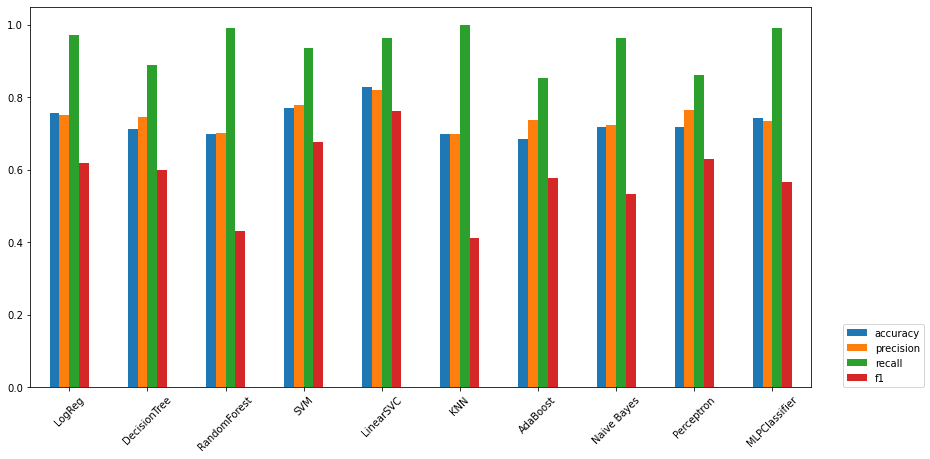

In [50]:
df_metrics.T.plot(kind='bar', figsize=(14,7));
plt.legend(loc=(1.04,0)); plt.xticks(rotation=45);

# <span style='font-family:"Times New Roman"'> <span styel=''> Change binary classes: female = 1 & male = 0

In [51]:
train_opposite = model_df.copy()
test_opposite = df_test.copy()

replace_str_to_catgorical = {1:0, 0:1}
train_opposite.replace(replace_str_to_catgorical, inplace=True)
test_opposite.replace(replace_str_to_catgorical, inplace=True)

In [52]:
train_opposite.head(10)

,gender,tokenized_clean_text
0,0,אחד קמתי סהרורי יצאתי מהמיטה מטושטש קמתי בצעדי...
1,0,לחבר היה הולדת וחיפשנו לעשות לו הולדת מנת לחגו...
2,0,האחרונה הייתה שנת קורונה פשוטה בקנה מידה אוניב...
3,0,כחצי עברתי לגור בצפון בת זוגתי עברנו לקיבוץ עמ...
4,0,חמישי רגיל מתחיל לעבור טיפה מאוחר ללכת בבוקר ל...
5,0,בשנה האחרונה חוויתי את מגפת הקורונה שהכריח את ...
6,0,בסמסטר קודם וכמה חברים ללימודים קבענו להיפגש ב...
7,1,בשנה האחרונה מידיי לעשות קורונה הצלחתי להוציא ...
8,0,קרה חודשים יושב בסלון ורואה חדשות ולפתע מקבל ס...
9,0,הסיפור שברתי את השעון היד הראשון שקניתי שהתגיי...


In [53]:
vectorizer.fit(train_opposite.tokenized_clean_text)
vector = vectorizer.transform(train_opposite.tokenized_clean_text)

CountVectorizer(max_features=7000)

In [54]:
ml_models={
    'LogReg'            : LogisticRegression(),
    'DecisionTree'      : DecisionTreeClassifier(),
    'RandomForest'      : RandomForestClassifier(),
    'SVM'               : SVC(kernel="linear",gamma=0.001),
    'LinearSVC'         : LinearSVC(),
    'KNN'               : KNeighborsClassifier(n_neighbors=9, metric='manhattan'),
    'AdaBoost'          : AdaBoostClassifier(), 
    'Naive Bayes'       : MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
    'Perceptron'        : Perceptron(),
    'MLPClassifier'     : MLPClassifier()
}

df_metrics=pd.DataFrame([])
predicts={}
vector_test = vectorizer.transform(test_opposite.story)


for model_name in ml_models.keys():
    
    metrics={}

    classifier = make_pipeline(ml_models[model_name])
    classifier.fit(vector, train_opposite.gender)

    pred_test = classifier.predict(vector_test)
 
    #acc_test = accuracy_score(df_test.gender, pred_test)
    #f1_test = f1_score(df_test.gender, pred_test, average='macro')
        
    metrics['accuracy']= accuracy_score(test_opposite.gender, pred_test)
    metrics['precision'] = precision_score(test_opposite.gender, pred_test)
    metrics['recall'] = recall_score(test_opposite.gender, pred_test)
    metrics['f1'] = f1_score(test_opposite.gender, pred_test, average='macro')
    df_metrics=pd.concat([df_metrics,pd.DataFrame(metrics,index=[model_name]).T],axis=1)
    



df_metrics.T.style.highlight_max(color='lightgreen').set_precision(3)

Pipeline(steps=[('logisticregression', LogisticRegression())])

Pipeline(steps=[('decisiontreeclassifier', DecisionTreeClassifier())])

Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])

Pipeline(steps=[('svc', SVC(gamma=0.001, kernel='linear'))])

Pipeline(steps=[('linearsvc', LinearSVC())])

Pipeline(steps=[('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=9))])

Pipeline(steps=[('adaboostclassifier', AdaBoostClassifier())])

Pipeline(steps=[('multinomialnb', MultinomialNB())])

Pipeline(steps=[('perceptron', Perceptron())])

Pipeline(steps=[('mlpclassifier', MLPClassifier())])

,accuracy,precision,recall,f1
LogReg,0.756,0.800,0.255,0.618
DecisionTree,0.782,0.760,0.404,0.693
RandomForest,0.705,1.000,0.021,0.434
SVM,0.769,0.720,0.383,0.675
LinearSVC,0.827,0.857,0.511,0.763
KNN,0.699,0.000,0.000,0.411
AdaBoost,0.686,0.467,0.298,0.578
Naive Bayes,0.718,0.636,0.149,0.534
Perceptron,0.718,0.545,0.383,0.630
MLPClassifier,0.756,0.909,0.213,0.598


### Use the grid search module to optimize model parameters

In [55]:
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(vector, model_df.gender)
k_vals = np.array([3,9,13])
dist_metrics=np.array(["manhattan", "euclidean", "chebyshev"])
classifier = GridSearchCV(estimator=classifier_knn, param_grid={'n_neighbors':k_vals, 'metric':dist_metrics})
classifier.fit(vector, model_df.gender)

KNeighborsClassifier()

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': array(['manhattan', 'euclidean', 'chebyshev'], dtype='<U9'),
                         'n_neighbors': array([ 3,  9, 13])})

In [56]:
classifier.best_score_

0.7445205479452055

In [57]:
print('K=',classifier.best_estimator_.n_neighbors,'distance-metric:',classifier.best_estimator_.metric)

K= 9 distance-metric: manhattan
